# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV




## Data Overview

- Observations
- Sanity checks

#### Loading the dataset

In [2]:
#loading the dataset
data=pd.read_csv('Extraalearn.csv')

In [3]:
#viewing data structure
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


#### Checking info of the dataset

In [5]:
# Let us see the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

- There are **4612 observations and 15 columns** in the dataset.
- All the columns have 4612 non-null values, i.e., **there are no missing values in the data.**

#### Let's check the unique values in each column

In [6]:
#number of unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

> * We can drop the column - ID as it is unique for each lead and will not add value to the model.
> * Most of the variables are categorical except - age, website_visits,time_spent_on_website, page_views_per_visit, and status are numeric.


#### Let's change the data type of status to category since it's a categorical variable

In [7]:
data['status']=data['status'].astype('category')

#### Viewing the changes of status column to category

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     4612 non-null   object  
 1   age                    4612 non-null   int64   
 2   current_occupation     4612 non-null   object  
 3   first_interaction      4612 non-null   object  
 4   profile_completed      4612 non-null   object  
 5   website_visits         4612 non-null   int64   
 6   time_spent_on_website  4612 non-null   int64   
 7   page_views_per_visit   4612 non-null   float64 
 8   last_activity          4612 non-null   object  
 9   print_media_type1      4612 non-null   object  
 10  print_media_type2      4612 non-null   object  
 11  digital_media          4612 non-null   object  
 12  educational_channels   4612 non-null   object  
 13  referral               4612 non-null   object  
 14  status                 4612 non-null   c

**Dropping the unique values column**

In [9]:
data.drop(columns='ID', inplace=True)

**Checking summary statistics**

In [10]:
#checking summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


#### Observations
The mean age is approximately 46 years old.
The mean and median of website_visits are very close to each other approximately 4 and 3 respectively.
The **time spent on website** ranges from 0 to 2537 with a mean of aproximately 724 time units.
The number of pages viewed per visit ranges from 0 to approximately 18 pages with a mean of 3 pages per visit which shows a right-skewed distribution


#### Univariate analysis for categorical variables

In [11]:
# Making a list of all catrgorical variables 
cat_col=['current_occupation','first_interaction','profile_completed','last_activity',
         'print_media_type1','print_media_type2','digital_media','educational_channels',
        'referral','status']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print('-'*50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

#### Observations
> * **70% of the leads were converted to a paid customer** and approximately 30% were not.
> * About **95% of the leads haven't heard about Extraa Learn through media type 2 (Magazine)**.
> * About **89% of the leads haven't read about Extraa Learn from Newpapers**.
> * About 11% of the leads know about Extraa Learn via digital platforms.
> * Approximately 15% of the leads know about Extraa Learn through educational channels (online forums, discussion threads, educational websites, etc.)
> * Most of the leads **(~98%) have not been referred**.
> * Approximately 73 % of the leads last activity is via email or website.
> * Around **49% of the leads complete their profile information on the website/mobile app.**
> * Around 55% of the leads first interaction is via Extraa Learn's Website.
> * Approximately **57% of the leads are currently working professionals**.

#### Converting categorical variables type to category

In [12]:
# Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [13]:
#viewing the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   category
dtypes: category(10), float64(1), int64(3)
me

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Univariate Analysis

### Histograms of numeric variables

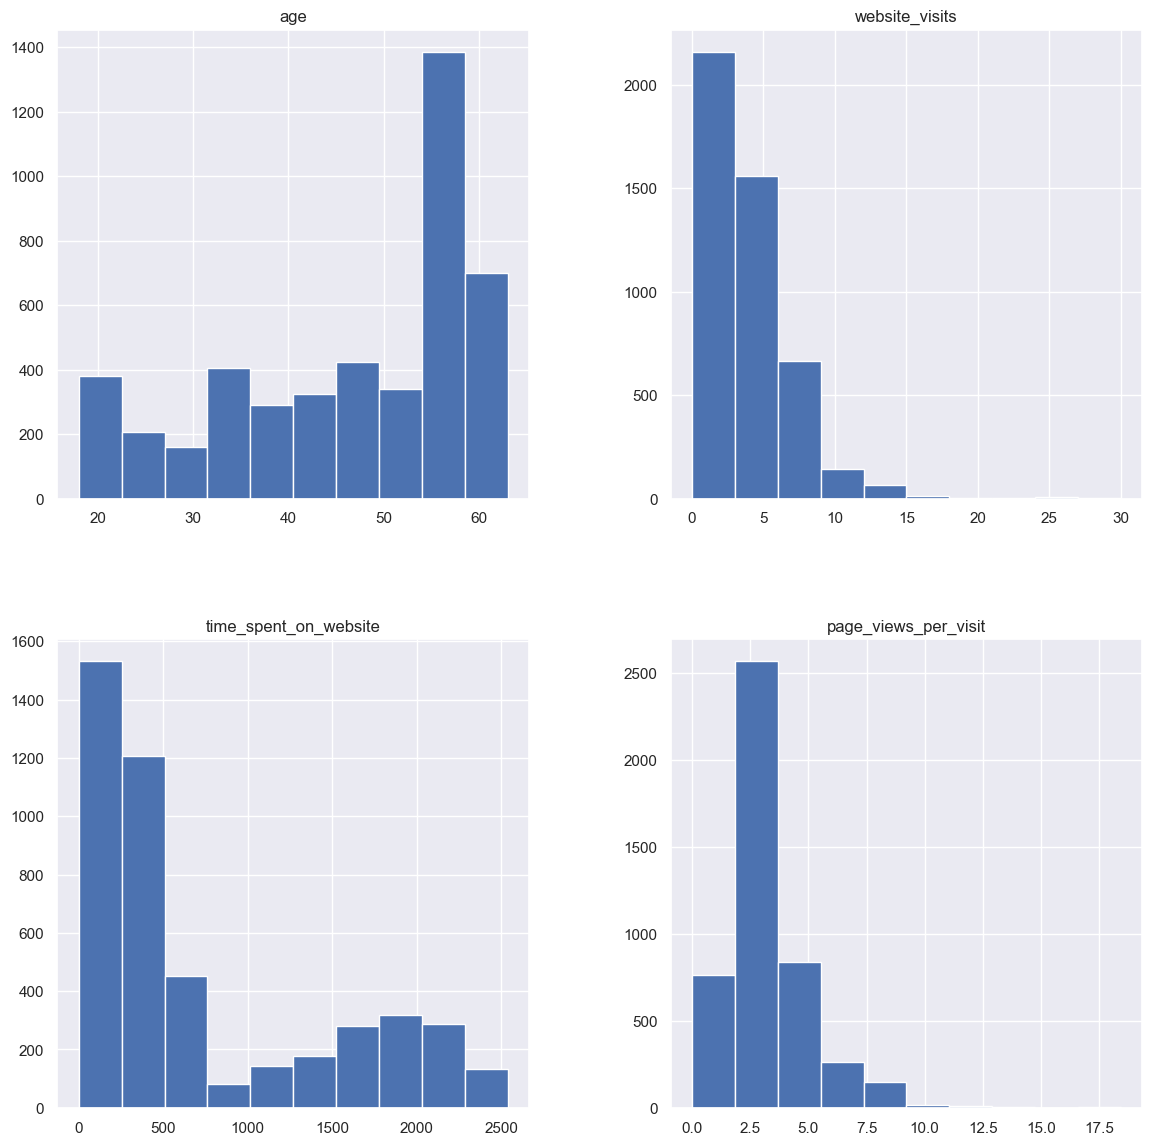

In [14]:
# Creating histograms
data.hist(figsize=(14,14))
plt.show()

#### Observations
> * The age distribution is left-skewed with most ages been between approximately 53 and 58 years old.
> * The website visits is highly right skewed with most visits between 0 to 2 approximately.
> * Page views per visit looks approximately normally distributed.
> * TThe distribution of time spent on the website is right-skewed, indicating that a large number of users spend a lower amount of time on the website, with fewer users spending very long periods of time.


#### Bivariate Analysis
Let's now check how the lead status is related with other categorical variables.

In [15]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

#### Question 1 : Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

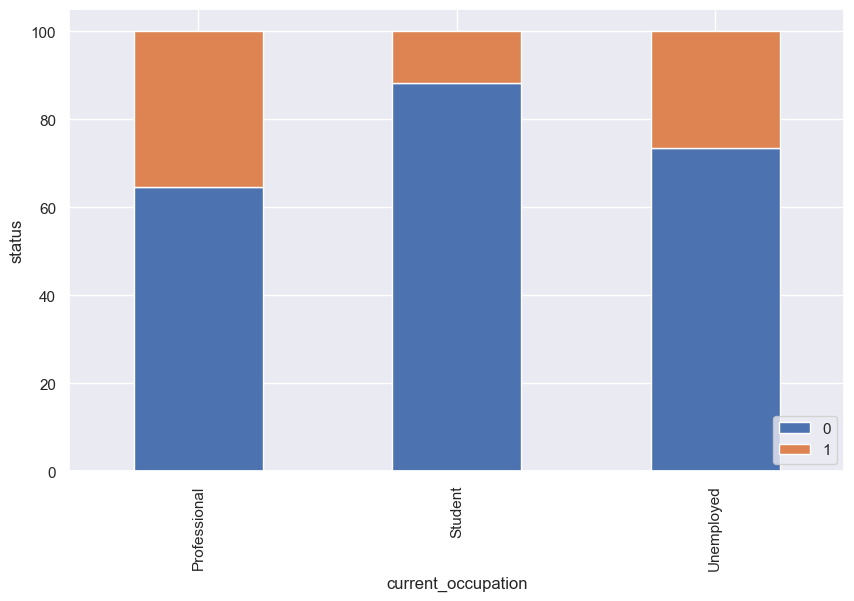

In [16]:
stacked_barplot(data,'current_occupation','status')

#### Answer :

> * The most common leads are students but this plot shows that the leads conversion rate is higher for professionals and those unemployed as compared to students.
> * Extraa Learn can target mostly Professionals and unemployed leads for more conversion rates.

#### Question 2 :The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 

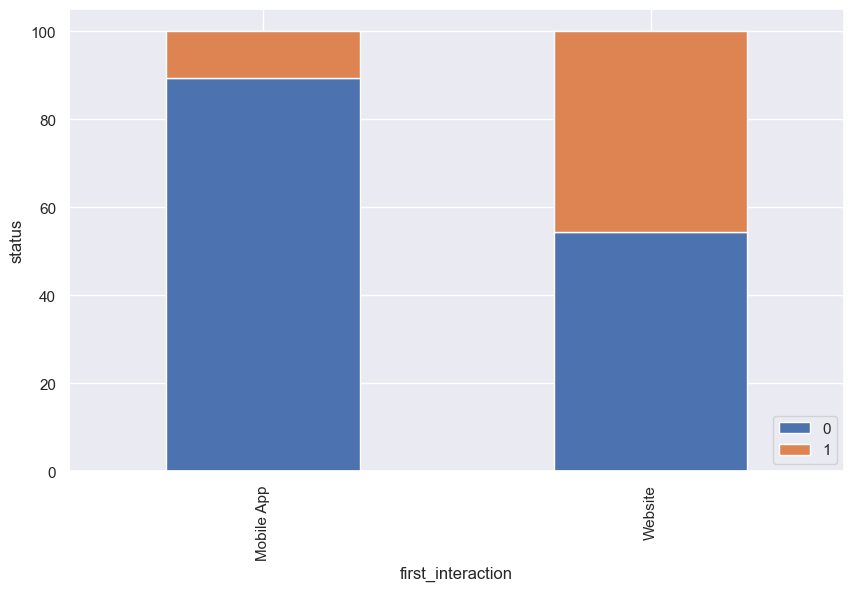

In [17]:
stacked_barplot(data,'first_interaction','status')

#### Answer 
> * The conversion rate of leads whose first interaction with Extraa Learn is via the Website is far higher than that with Mobile App. Thus the Website usage has more impact on lead status than mobile app. 

#### Question 3 : The company uses multiple modes to interact with prospects. Which way of interaction works best? 

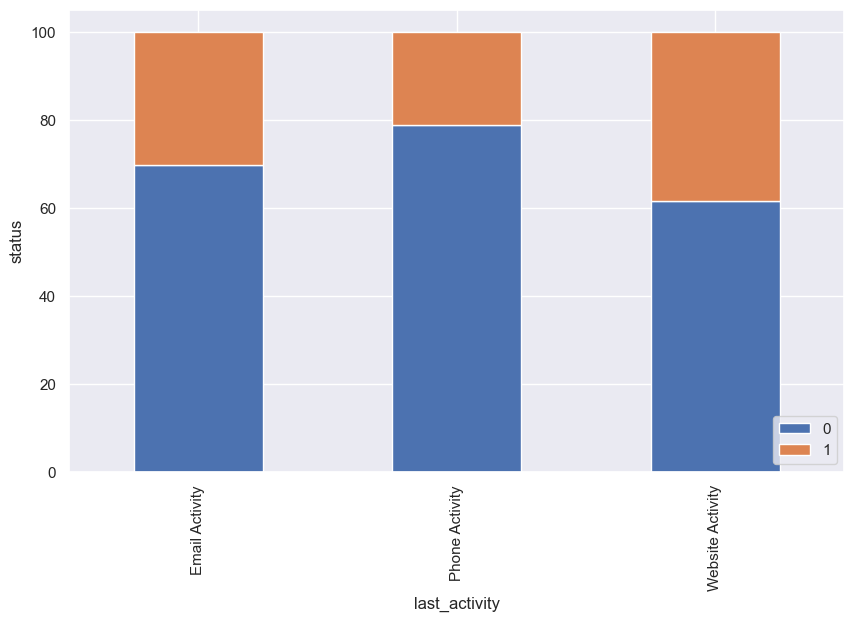

In [18]:
stacked_barplot(data,'last_activity','status')

#### Answer
 Website Interactions are more effective in converting leads compared to Email and Phone Activity, as indicated by the plot. Phone activity has the least conversion rate

#### Question 4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

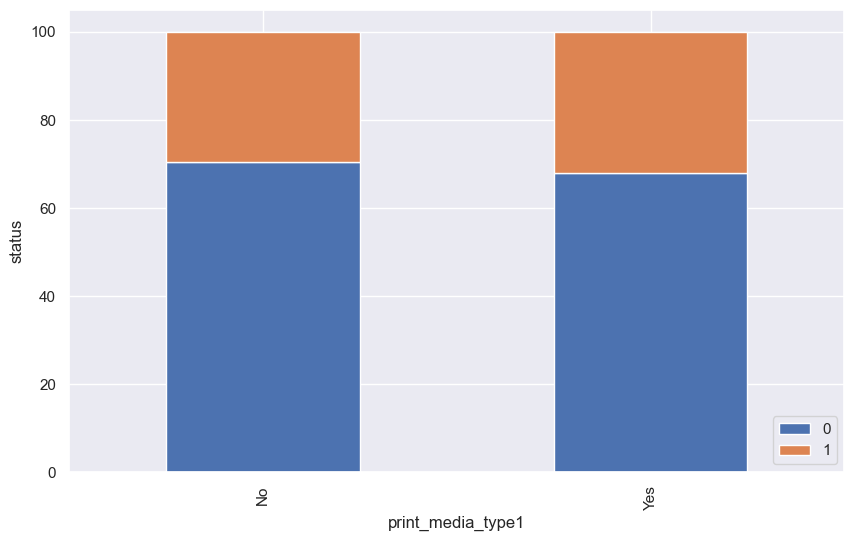

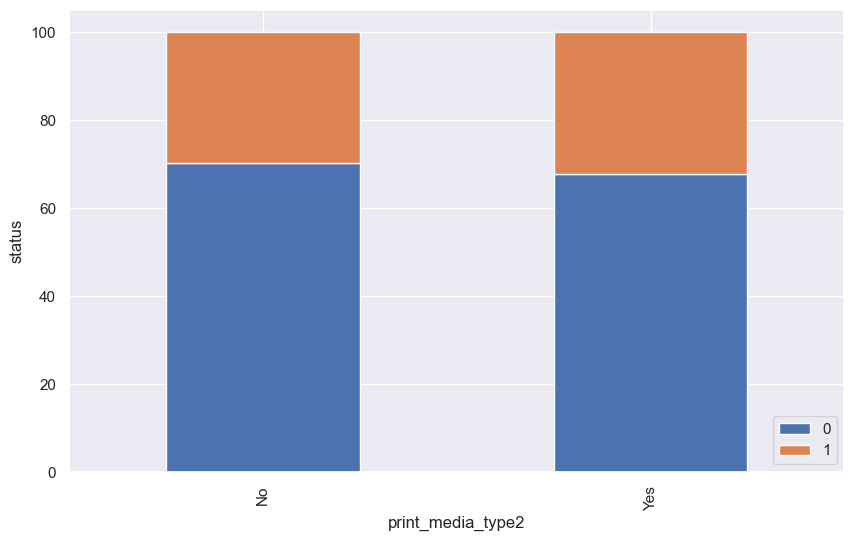

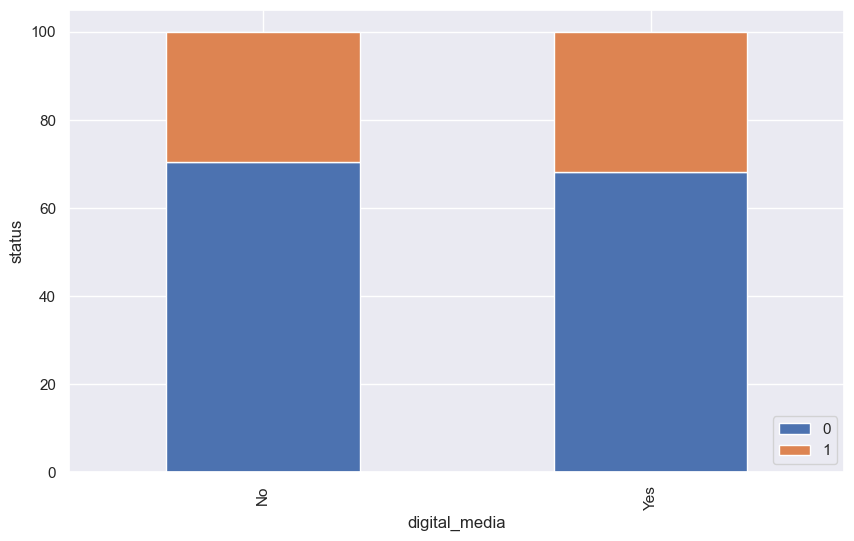

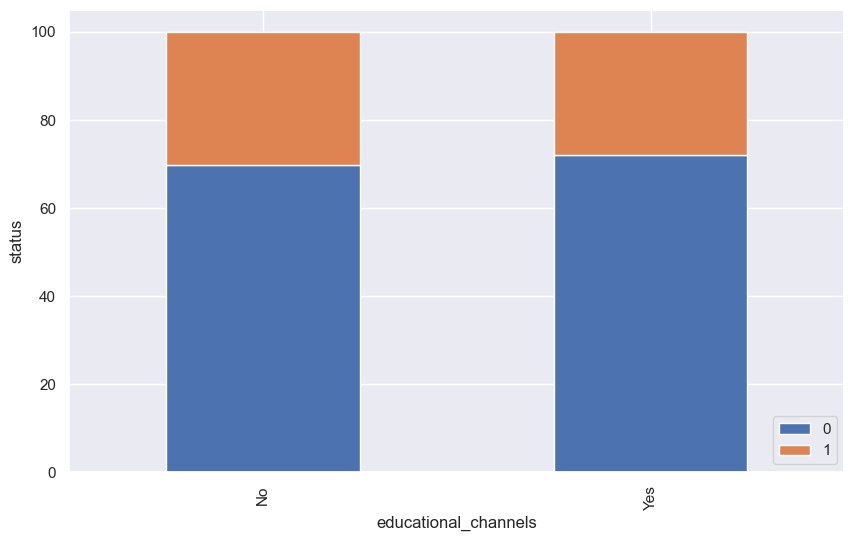

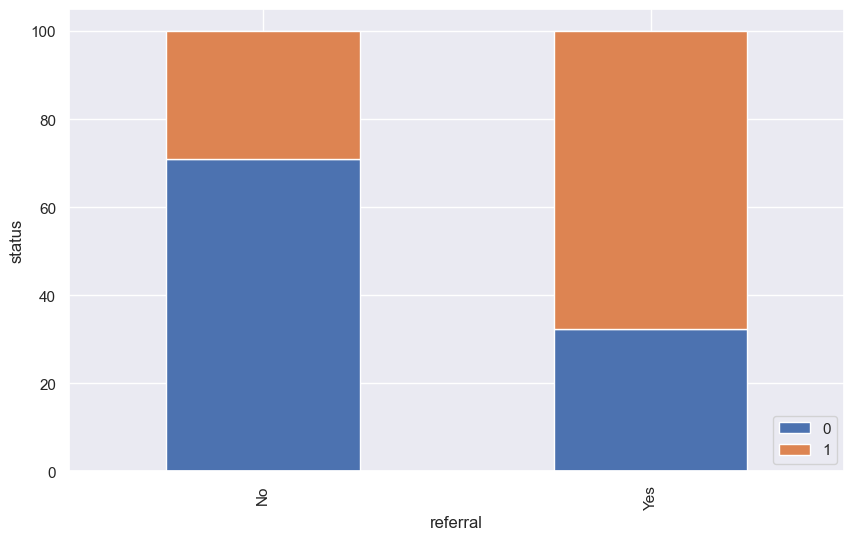

In [19]:
cat_col_without_status=['print_media_type1','print_media_type2','digital_media','educational_channels','referral']
for i in cat_col_without_status :
    stacked_barplot(data,i,'status')

#### Answer
From the above graph we can see that lead referrals have the highest conversion rate and the rest of the other channels (print media, digital media, educational channels) are quite balanced

#### Question 5 : People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

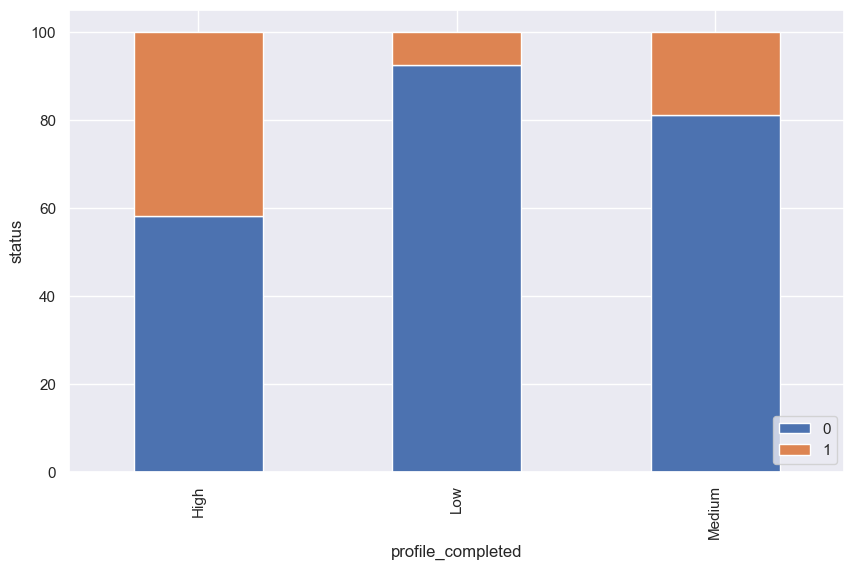

In [20]:
stacked_barplot(data,'profile_completed','status')

#### Answer
Yes having more details about a prospect increases the chances of conversion as seen by the graph. The conversion rate for low profile completion is the least.

#### Multivariate analysis

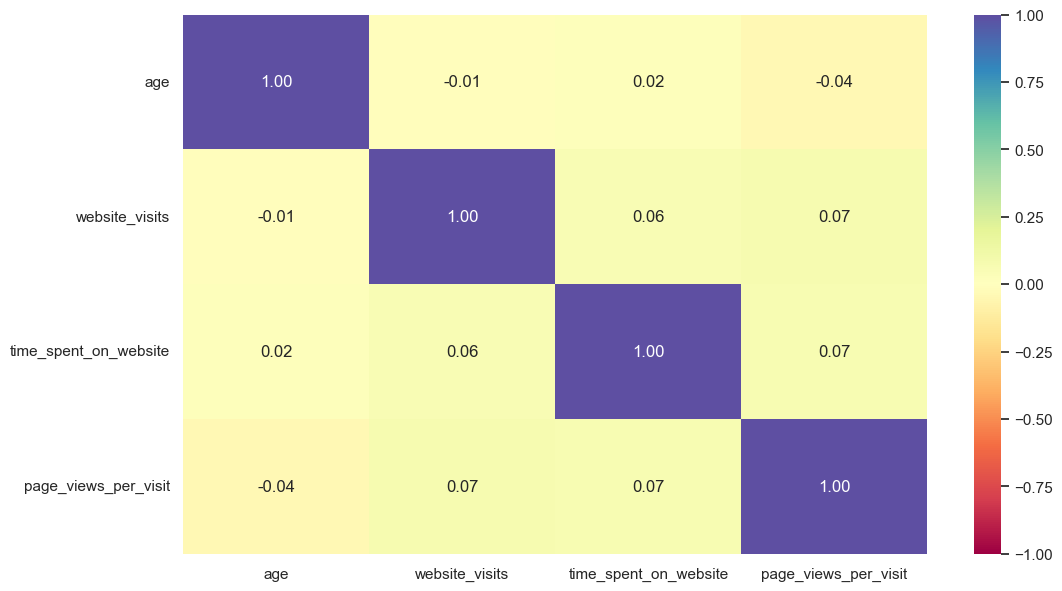

In [21]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

As we observe there is really very week correlation between the numreical values.

#### checking the relationship between status and numerical variables

In [22]:
# Mean of numerical variables grouped by status
num_cols=['age','website_visits','time_spent_on_website','page_views_per_visit']
data.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


#### Observations
>* The average age of converted leads is slightly higher than that of non-converted leads. This might suggest that slightly older individuals are more likely to convert, possibly due to more financial stability or a stronger commitment to professional development.
>* There's a significant difference in the average time spent on the website between the two groups. Converted leads spend nearly twice as much time on the website as non-converted leads. This implies that the longer a lead spends on the website, the higher the chances of conversion.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Outlier detection

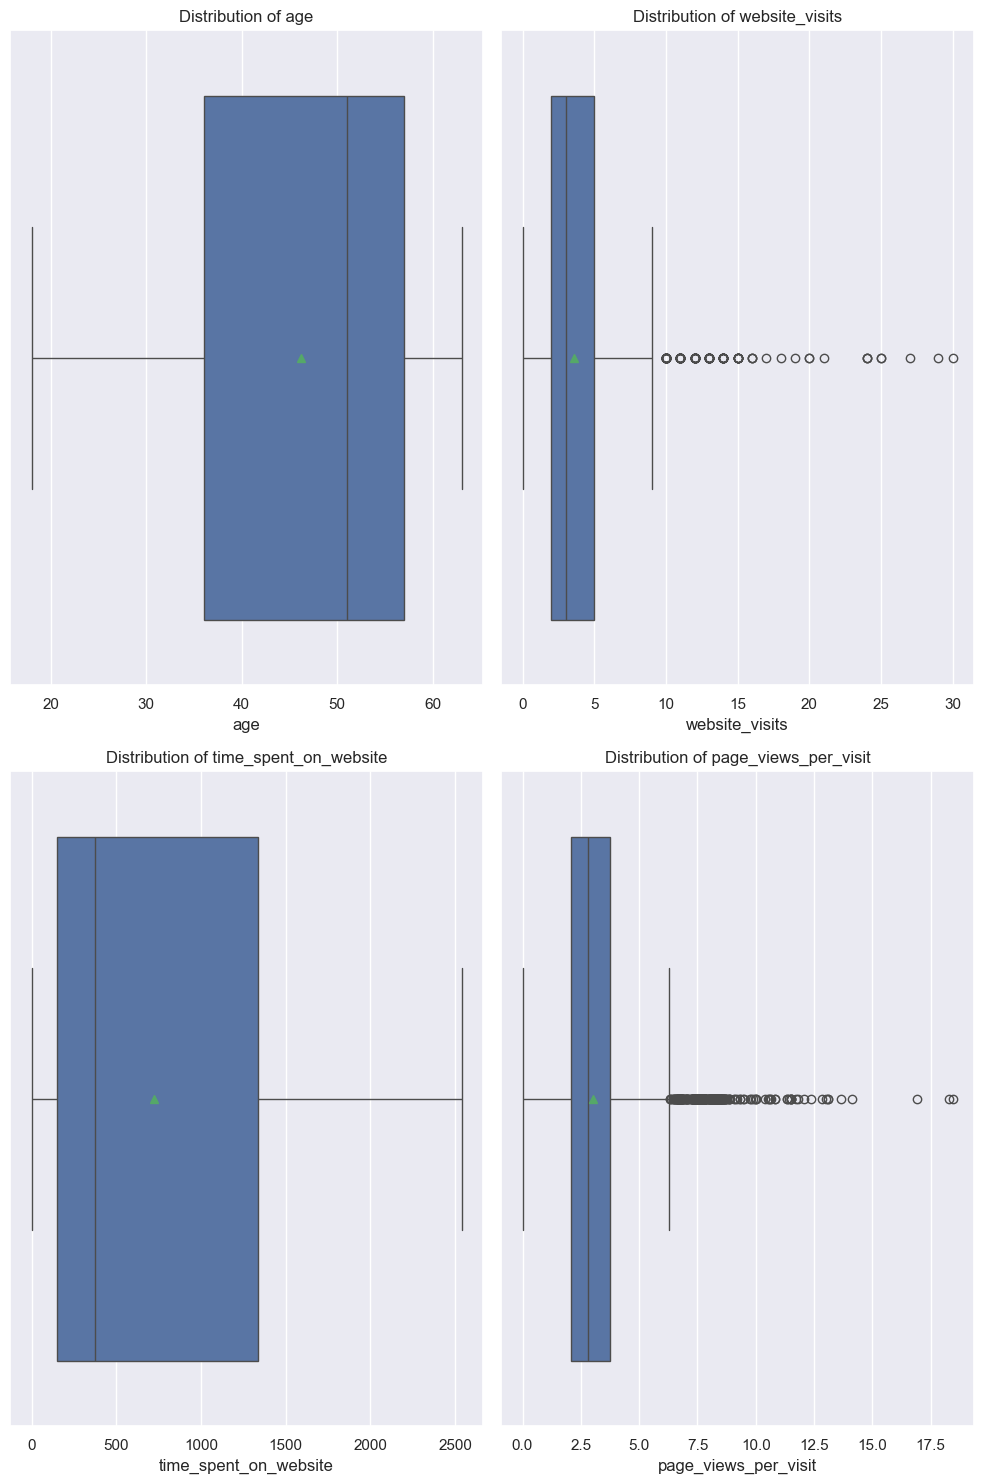

In [23]:
# Set up the matplotlib figure correctly with plt.subplots
numeric_columns=['age','website_visits','time_spent_on_website','page_views_per_visit']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=col, data=data, ax=axes[i],showmeans=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

#### Observations
>* Website visits: There are several outliers that indicate a few visitors are making a significantly higher number of visits to the website compared to the average user. There are several outliers that indicate a few visitors are making a significantly higher number of visits to the website compared to the average user.
>* Page views per visit : There is a smaller interquartile range (IQR) in 'page_views_per_visit' compared to 'website_visits', which indicates less variability in the number of page views during a visit. Outliers are present here as well, with a few visits having a very high number of page views, which could be due to highly engaged users.

## EDA

- It is a good idea to explore the data once again after manipulating it. There are no missing values as we observed earlier when viewing the data info.

In [24]:
#shape of data
data.shape

(4612, 14)

#### Data Preparation for modelling 

#### Conversion of categorical variables to numerical variables

In [25]:
# Creating list of dummy columns
to_get_dummies_for = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral']

# Creating dummy variables
data = pd.get_dummies(data = data, columns = to_get_dummies_for, drop_first = True)      


#### Separating the independent variable(X) and the dependent variable(Y)

In [26]:
# Separating target variable and other variables
X=data.drop(columns='status')
Y=data['status']

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [27]:
X_train, X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [28]:
#converting data types of columns to float
for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [29]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [30]:
model_dt = DecisionTreeClassifier(random_state = 1)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

#### Checking the performance of the model on train and test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



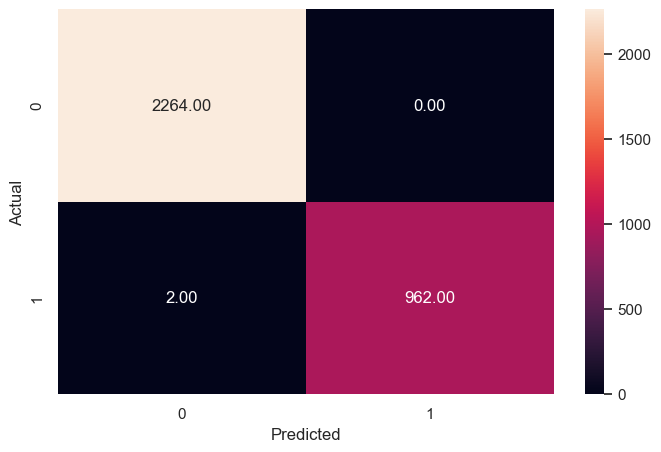

In [31]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train,pred_train_dt)

⁠Almost 0 errors on the training set, each sample has been classified correctly.
Model has performed very well on the training set.
As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
Let's check the performance on test data to see if the model is overfitting.

#### Checking performance on test set

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       971
           1       0.67      0.65      0.66       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



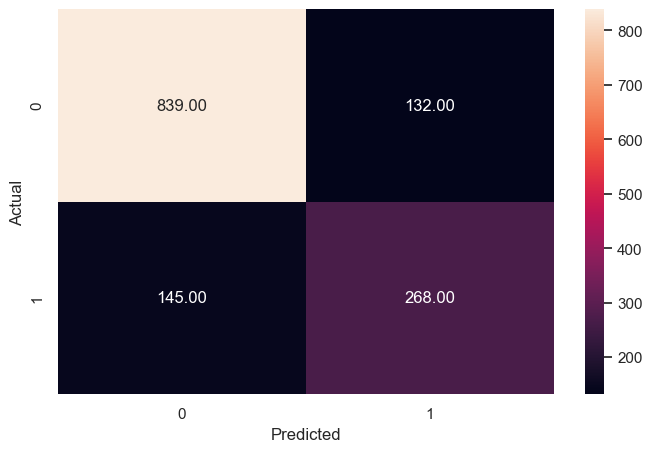

In [32]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test,pred_test_dt)

⁠The decision tree model is clearly overfitting because we have 80 % accuracy on test set but 100% accuracy on training set.  ⁠We will have to tune the decision tree to reduce the overfitting.

## Do we need to prune the tree?

### Yes. There is high overfitting so we need to prune the tree

#### Performing hyperparameter tuning for the decision tree model using GridSearch CV to improve the model performance

In [33]:
# Choose the type of classifier 
estimator = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

#### Checking the performance on training set

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



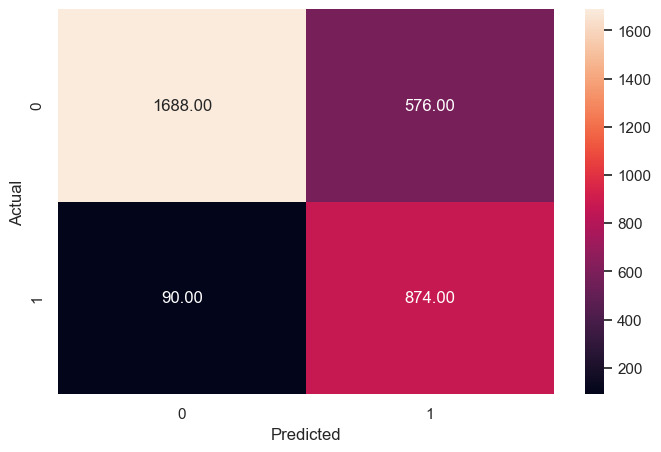

In [34]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

#### Checking the performance on testing set

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



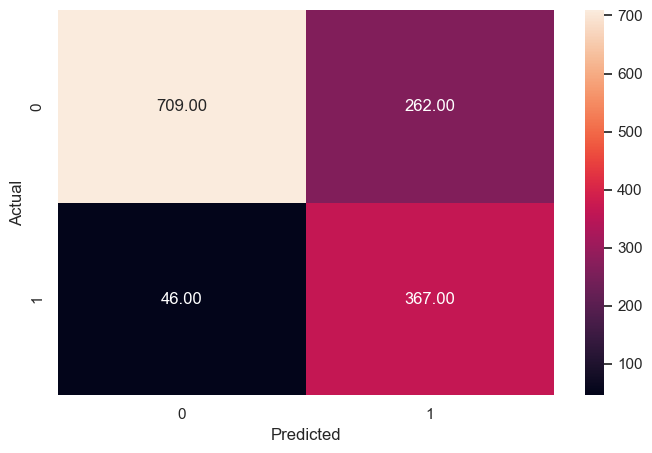

In [35]:
#Checking performance on the testing dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

#### Observations:
⁠Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
Tuned model has provided a generalised performance with low precision and high recall because we do not want to miss a lead who actually converts to paid customer but our classifier said the lead didn't convert. Thus we want the number of False Negatives to be as low as possible. **The accuracy is 79 % and 78 % on training and testing data respectively.**

#### Visualizing the tree

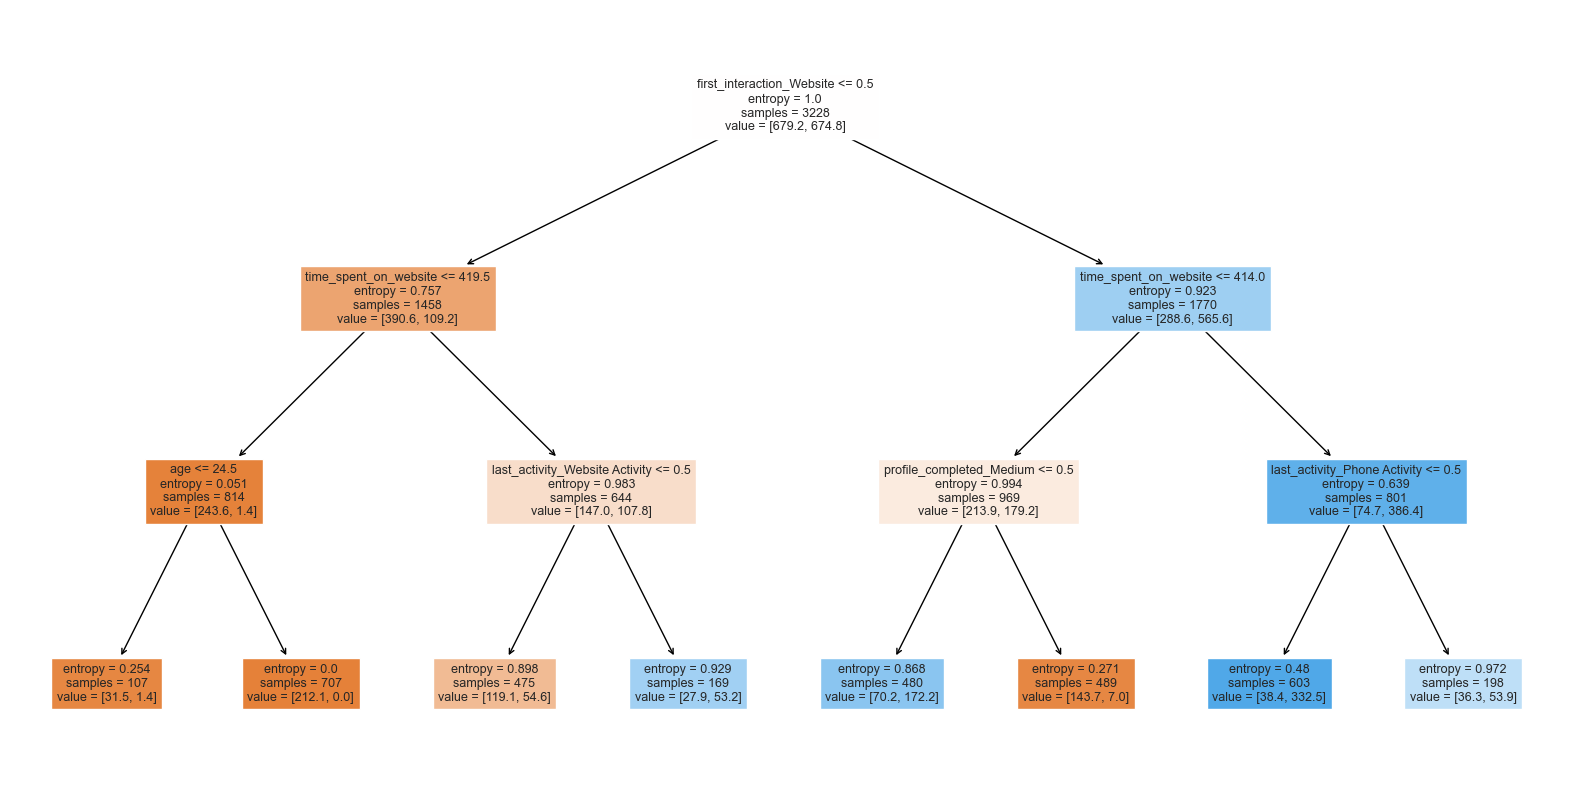

In [36]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### important features based on the tuned decision tree

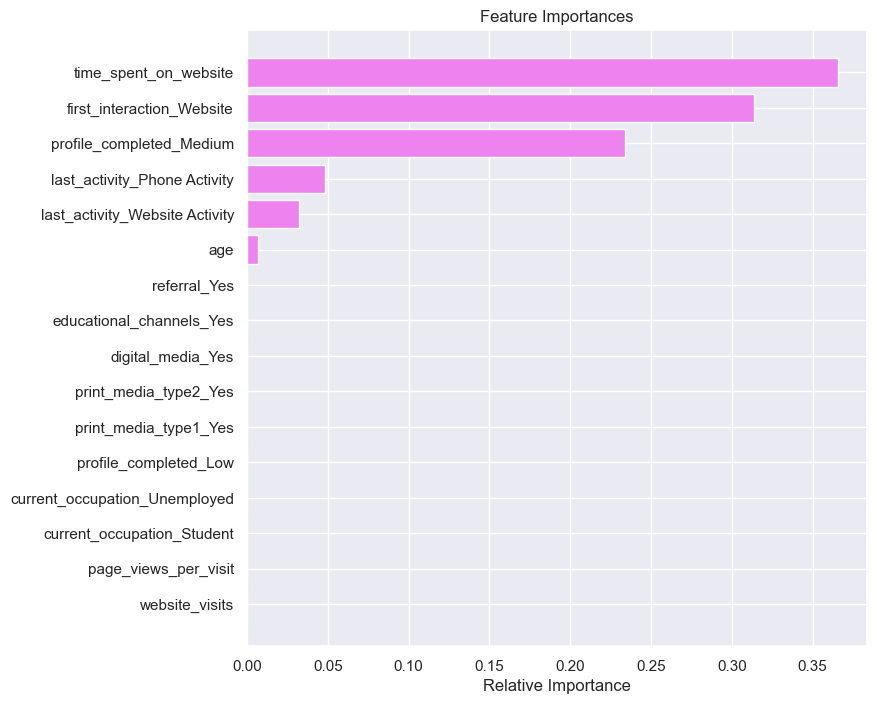

In [37]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Obervations:
* We can see that the tree has become simpler and the rules of the trees are readable 
* The model performance has been generalized
* We see that the most important features are :
      -Time spent on website
      -First interaction website
      -Profile completed medium

## Building a Random Forest model

In [38]:
# Random Forest model
rf_estimator = RandomForestClassifier(random_state=42)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Checking the performance on testing set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



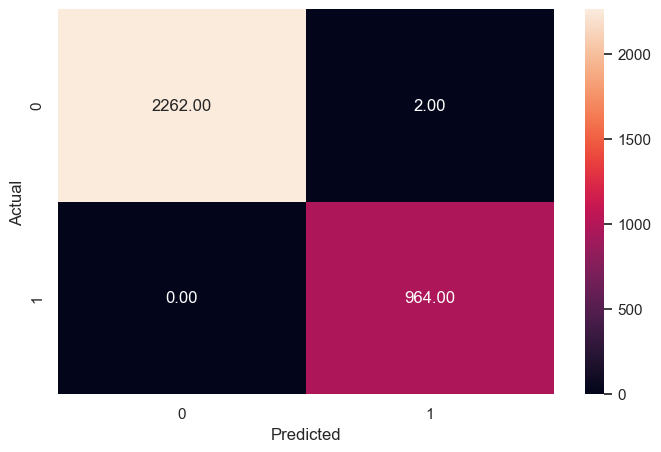

In [39]:
# Checking performance on the training dataset
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train_rf)

Almost 0 errors on the training set each sample has been classified correctly. The model has performed very well on training set

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.79      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



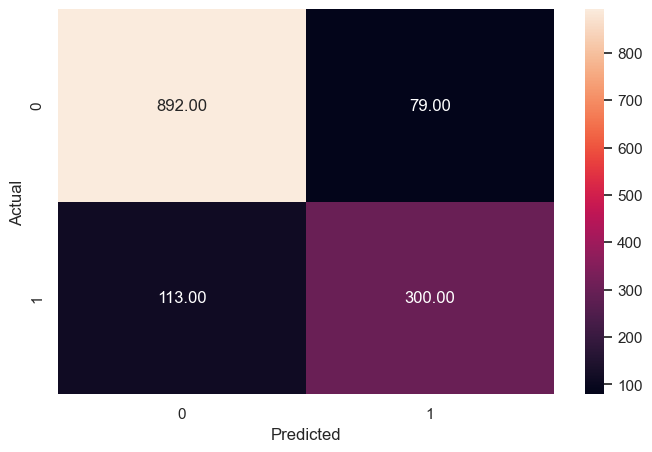

In [40]:
# Checking performance on the testing dataset
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test_rf)

The Random Forest classifier seems to be overfitting. We can reduce overfitting by hyperparameter tuning

## Do we need to prune the tree?

#### Yes there is high overfitting.

In [41]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train, y_train)



RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

#### Checking perfomance of RF on training set

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.68      0.88      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



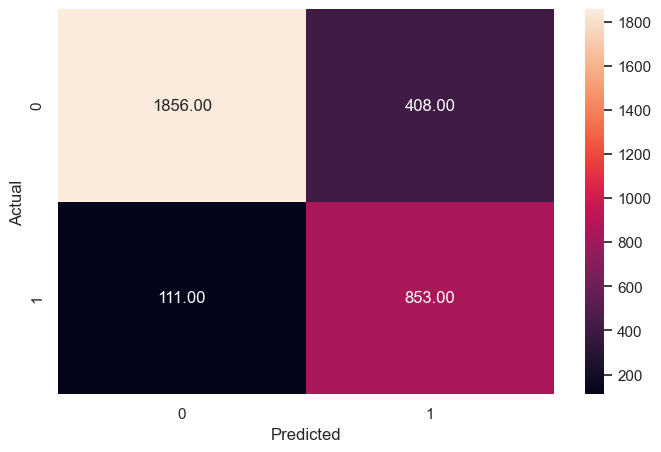

In [42]:
# Checking performance on the training dataset
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train,y_pred_train_rf_tuned)

#### Checking perfomance of RF on testing set

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       971
           1       0.65      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.85      0.82      0.83      1384



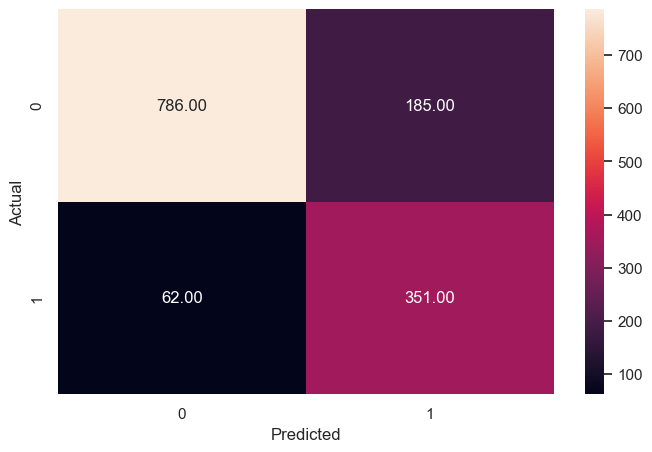

In [43]:
# Checking performance on the testing dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test,y_pred_test_rf_tuned)

**Observations :**
> * As we can see the model performs better than the decision tree on both **training with accuracy of 84 % and testing with accuracy of 82 %.** The **recall is also high with 88% and 85 % for training and testing respectively.**

#### Let's check the feature importance based on Random Forest

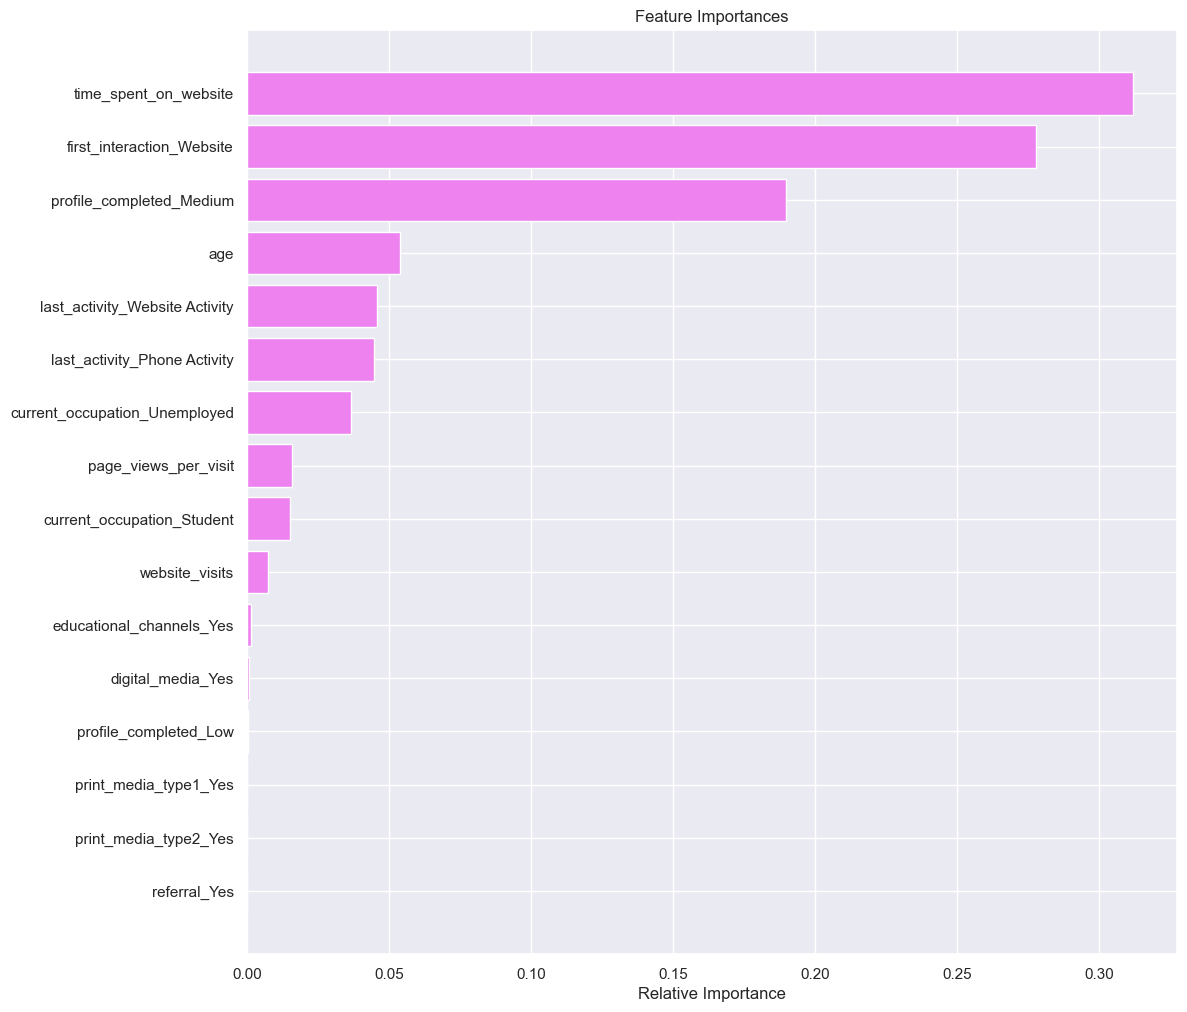

In [44]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

> * The Random Forest further verifies the results of the decision tree that the most important features are time spent on website, first interaction website and profile completed medium

## Actionable Insights and Recommendations

> * The significant amount of time spent on the website by converted leads indicates high engagement is correlated with conversion.
> * Phone and website interactions had a higher conversion rate than email.
> * Enhance content quality, create interactive pathways, and improve user experience to keep potential leads engaged for longer periods.
> * Invest in training for sales representatives to optimize phone conversions and improve live chat support on the website. Reassess email marketing strategies to increase their effectiveness.
> * Provide incentives for users to complete their profiles, such as access to exclusive content or a free trial period.
> * Create a referral program that leverages satisfied customers to bring in new leads through rewards or recognition.